# Chapter 1 - Radioactive Decay

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## The equation

The equation describing radioacive decay is

$$ {dN \over dt} = - {N \over \tau}$$

Concretely, this means that for a radioactive nucleus, the decay rate of nucleons is directly proportional to the number of remaining nucleons over the time constant, $\tau$.

This differential equation has an analytic solution:

$$N(t) = N_{i} e ^ {-t \over \tau}$$

Where $N_{i}$ is the intial number of un-decayed nucleons.

## Numerical Approach

While we _know_ the analytical solution to radioactive decay (and therefore we do not _need_ a an approximate solution), we will use the problem of radio-active decay to demonstrate a numerical method.

By performing a taylor expansion on the differential equation describing radioacive decay, we can arbitrarily approximate the solution to the diferential equation with subsequently higher taylor terms.

### Taylor Exapansion

$$ {dN \over dt } \approx N_i + {dN \over dt} \Delta t + {1 \over 2}{d^2N \over dt^2}(\Delta t)^2 \cdots  $$

### Approximation

Since the functional form of the derivative is already known, we can drop in the definition of the first derivative and use a small time step to estimate the next time step.

Putting this together, and dropping subsequent terms, we can form an iterative relationship between the currently known number of nucleons and the _next_ estimated number of nucleons by looking at the first order term:

 
$$ {dN \over dt } \approx N_i + {dN \over dt} \Delta t \rightarrow N(t+\Delta t) \approx N(t) - {N(t) \over \tau } \Delta t$$

### Modeling

Now, we can start with a particular nuclei count, and a small time-stamp, and then compute the expected value of nuclei at some future time, t. We can 'step' our way there by applying a fixed number of time-stamps, with a time-granularity.

# Uranium

It takes 4.5 billion years for 50% of uranium to decay. Choosing units of time as 100,000,000 years, we can then choose an appropritate value for $\tau$.

1. $$ 0.5 = 1.0 \times e ^ {-4.5 \over \tau}$$
2. $$ log_e(0.5) = {-4.5 \over \tau}$$
3. $$ { 1 \over log_e(0.5) }  = {\tau \over -4.5}$$
4. $$ { 1 \over log_e(0.5) } \times -4.5 = \tau $$
5. $$ \tau = -6.492127684 $$

## Simulations

Simulate the amount of remaining uranium, given an inital amount of uranium.

In [72]:
def create_base_dataset(n_atoms, tau, time_begin, time_end, intervals):
  delta_t = (time_end - time_begin) / intervals
  print(f"Delta t: {delta_t} billion years")
  print(f"Intervals: {intervals}")
  print(f"Inital atoms: {n_atoms}")
  
  current_time = time_begin
  out = []
  curr_atoms = n_atoms
  while current_time <= time_end:
    next_atoms = curr_atoms + curr_atoms / tau * delta_t
    next_atoms_exact = n_atoms * np.exp(current_time / tau)
    out.append({
      'time': current_time,
      'n_atoms_approx': curr_atoms,
      'n_atoms_exact': next_atoms_exact,
      'pct_error': np.fabs(curr_atoms - next_atoms_exact)/next_atoms_exact
    })
    current_time += delta_t
    curr_atoms = next_atoms
  return pd.DataFrame.from_records(out).set_index('time')

In [73]:
df = create_base_dataset(n_atoms=100, time_begin=0, time_end=4.5, intervals=100, tau=-6.492127684)

Delta t: 0.045 billion years
Intervals: 100
Inital atoms: 100


<AxesSubplot:xlabel='time'>

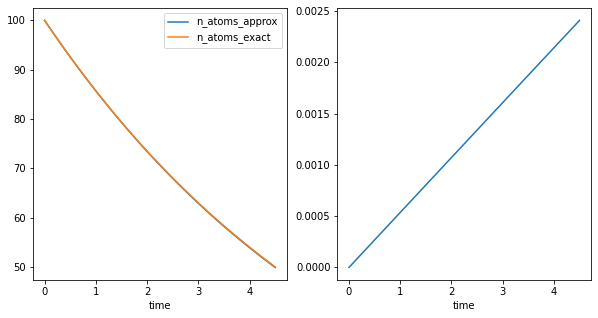

In [75]:
fig, (ax_l, ax_r) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df[['n_atoms_approx', 'n_atoms_exact']].plot(ax=ax_l)
df['pct_error'].plot(ax=ax_r)